Dropdown(description='Type:', options=('Tous', 'GRASS', 'POISON', 'FIRE', 'FLYING', 'DRAGON', 'WATER', 'BUG', …

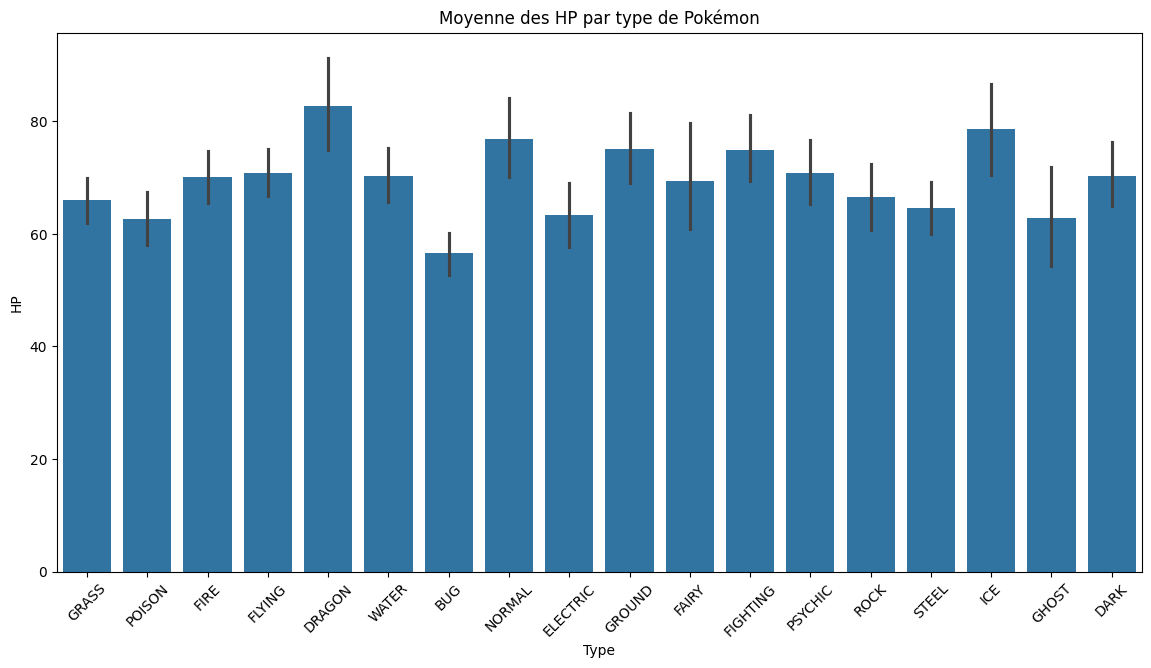

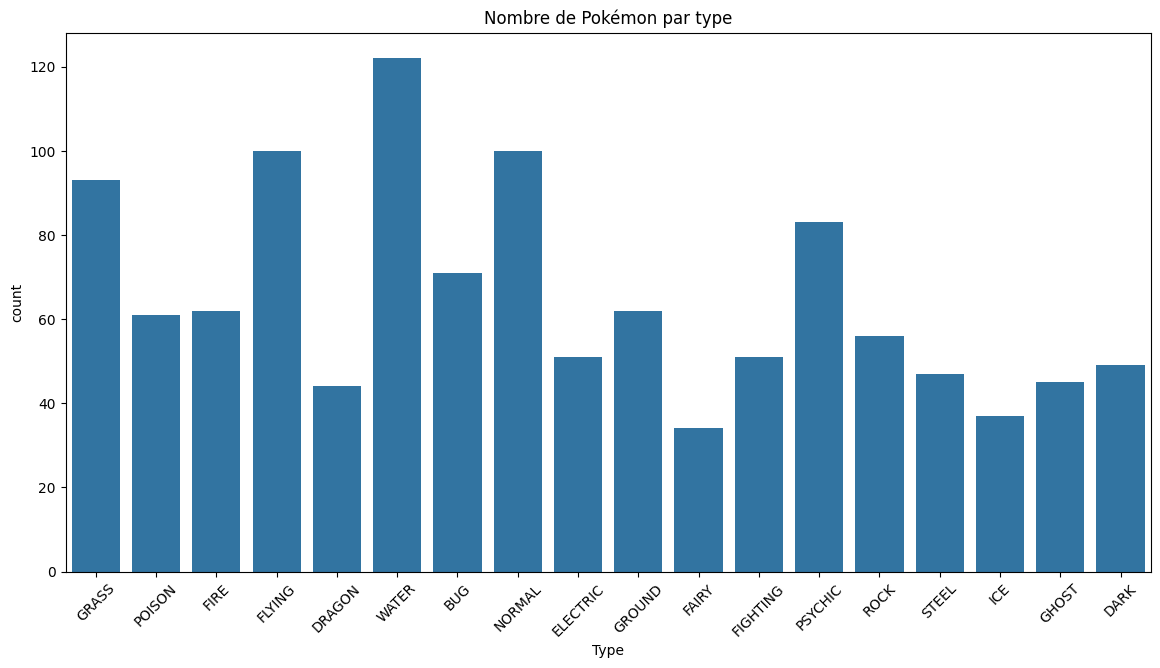

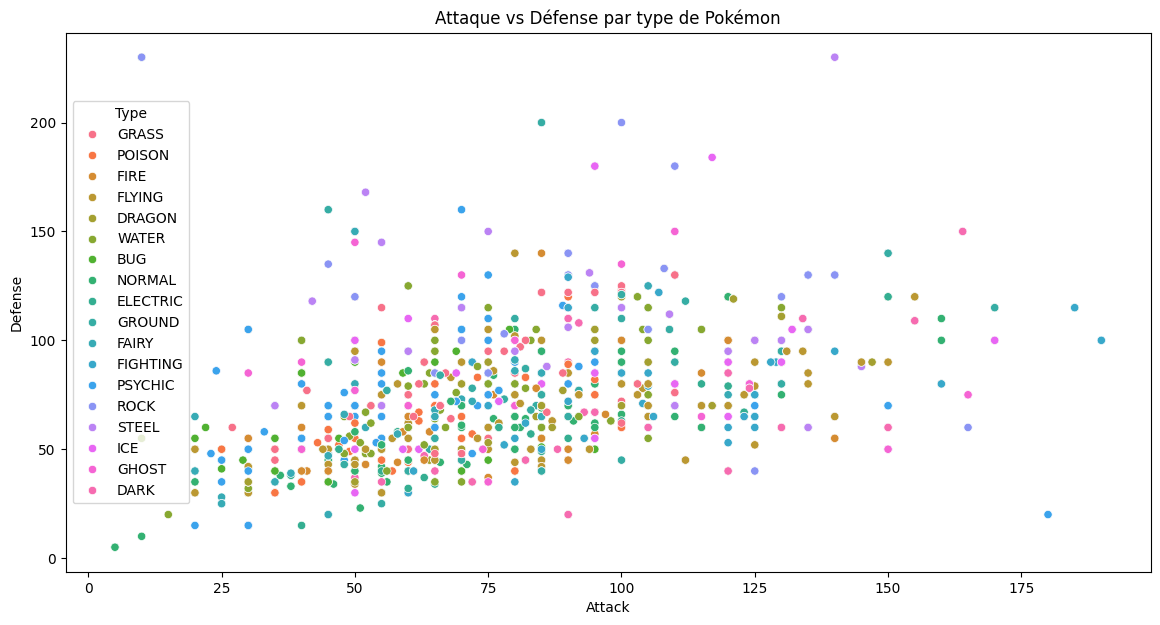

In [1]:
# Import des bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output
from IPython.core.display import HTML

# Lire le fichier Excel et charger chaque feuille dans un DataFrame
xls = pd.ExcelFile(r'C:\Users\yzi\Desktop\Travaux\DataViz\data\pokemon.xlsx')
sheets = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Afficher le titre et la description du dashboard
display(Markdown("# Dashboard Pokémon"))
display(Markdown("""
## Analyse des Statistiques des Pokémon
Utilisez les filtres ci-dessous pour personnaliser les visualisations.
"""))

# Création d'un widget Dropdown pour le filtre de type de Pokémon
type_filter = widgets.Dropdown(
    options=['Tous'] + list(sheets['Pokemon']['Type'].unique()),
    value='Tous',
    description='Type:',
)
display(type_filter)

# Fonction pour mettre à jour les visualisations
def update_visualizations(selected_type):
    # Filtrer les données
    if selected_type == 'Tous':
        filtered_data = sheets['Pokemon']
    else:
        filtered_data = sheets['Pokemon'][sheets['Pokemon']['Type'] == selected_type]
    
    # Effacer les sorties précédentes
    clear_output(wait=True)
    display(type_filter)
    
    # Visualisation de la moyenne des HP par type de Pokémon
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Type', y='HP', data=filtered_data, estimator=np.mean)
    plt.title('Moyenne des HP par type de Pokémon')
    plt.xticks(rotation=45)
    plt.show()

    # Visualisation du nombre de Pokémon par type
    plt.figure(figsize=(14, 7))
    sns.countplot(x='Type', data=filtered_data)
    plt.title('Nombre de Pokémon par type')
    plt.xticks(rotation=45)
    plt.show()

    # Relation entre les statistiques d'Attaque et de Défense
    plt.figure(figsize=(14, 7))
    sns.scatterplot(x='Attack', y='Defense', data=filtered_data, hue='Type')
    plt.title('Attaque vs Défense par type de Pokémon')
    plt.show()

# Fonction de rappel pour le changement de filtre
def on_type_filter_change(change):
    update_visualizations(change.new)

type_filter.observe(on_type_filter_change, names='value')

# Appel initial des visualisations avec la valeur sélectionnée dans le filtre
update_visualizations(type_filter.value)

# Ajouter du style personnalisé pour le dashboard
style = HTML("""
<style>
    .widget-label { width: 20ex !important; }
    /* Ajoutez plus de styles ici */
</style>
""")
display(style)

# Ajouter un résumé des données
display(Markdown("### Résumé statistique des Pokémon"))
display(sheets['Pokemon'].describe())
